<a href="https://colab.research.google.com/github/mirpouya/Pytorch_Tutorial/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Work flow
* ## getting the data ready
* ## turn the data into tensors
* ## build or pick a pretrained model
  1. pick a loss function and optimizer
  2. build a training loop
* ## fit the model to the data to make prediction
* ## evaluate the model
* ## improve through experimentation
* ## save and reload the trained model

In [1]:
import torch
from torch import nn # nn contains all of pytorch's neural network's building blocks 
import matplotlib.pyplot as plt

# checkout pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data(preparing and loading)

In [2]:
# generating some linear regressoin data

# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [3]:
torch.arange(start, end, step).unsqueeze(dim=1).shape

torch.Size([50, 1])

In [4]:
# splitting the data into test and train

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# a function for plotting predictions

def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None):
  """
  plots training data, test data, and compares predictions
  """
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the ledgend
  plt.legend(prop={"size":14})


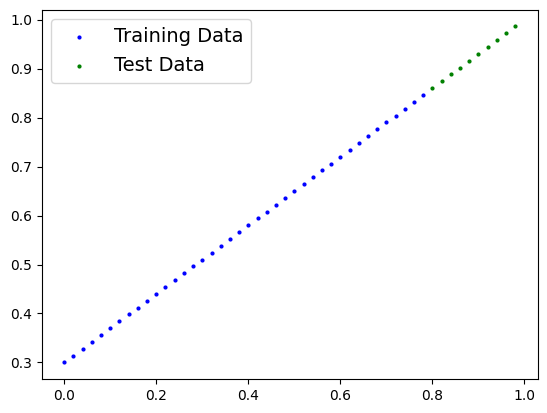

In [6]:
plot_predictions()

## 2. Build model

In [7]:
# create linear regression model class

class LinearRegressionModel(nn.Module): 
  # almost everything in PyTorch inherits from nn.Module

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the model
    # any subclass of nn.Module needs to override forward()
    # forward method is in the __init__
  def forward(self, x: torch.Tensor) -> torch.Tensor: 
  # "x" is the input data, with Tensor type, expect to return a Tensor
    return self.weights * x + self.bias

## PyTorch model building essentials

* <b> torch.nn:  </b> contains all of the building blocks for computational graphs
* <b> torch.nn.Parameter: </b> what parameters should our model try and learn
* <b> torch.nn.Module: </b> the base class for all neural network modules, if you subclass it, you should override forward( )
* <b> torch.optim: </b> this is where optimizers in PyTorch live, they will help with gradient descent.
* <b> def forward(): </b> all nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation

In [8]:
# create a random seed
torch.manual_seed(42)

# create an instance of our model
model_0 = LinearRegressionModel()

# checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# list mame parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

## Making predictions using "torch.inference_mode( )"

In [11]:
# make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

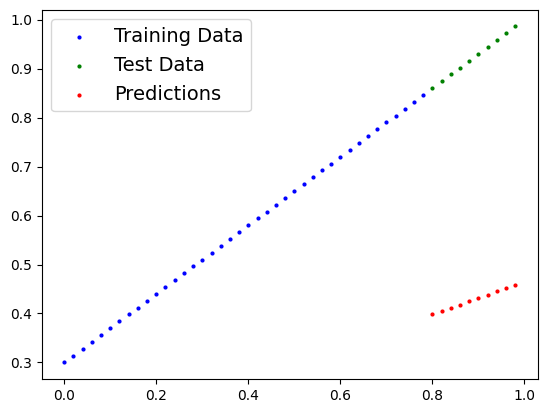

In [12]:
# visualize predictions with plot_predictions function

plot_predictions(predictions=y_pred)

## 3. <b> Training the model </b>

Things we need to train the model:

1. <b> Loss function: </b> 
   measures how wrong your model's predictions are

2. <b> Optimizer: </b>
   takes into account the loss of a model and adjust the model's parameters

specifically for PyTorch, we need a <b> Training Loop </b> and a <b> Testing Loop </b>

In [13]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### <b> Building a training loop and a testing loop </b>

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (data moving through model's forward()) -> forward propagation
2. calculate the loss
3. Optimizer zero grad
4. Loss backward - move backward to calculate the gradients of all the parameters we need with repect to the loss
5. Optimizer step - adjust model parameters to improve the loss

In [14]:
# each epock is one loop through the data
epochs = 1

# 0. loop throught the data
for epoch in range(epochs):
  # set the model to training mode
  # train mode in PyTorch tracks all parameters that requires_gradients 
  model_0.train()

  # 1. forward pas
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss 
  #    with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  model_0.eval() # turns off gradient tracking

In [15]:
# training loop

epochs = 10

for epoch in range(epochs):

  # 0. set the model to training mode -> it allows gradient tracking
  model_0.train()

  # 1. forward pass to calculate y_prediction
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. zero out previous gradients
  optimizer.zero_grad()

  # 4. backpropagation to calculate gradients
  loss.backward()

  # 5. optimizer step
  optimizer.step()